<a href="https://colab.research.google.com/github/RajeshRamachander/tsnejaxproject/blob/main/tsnejax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I0000 00:00:1699288091.555864       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


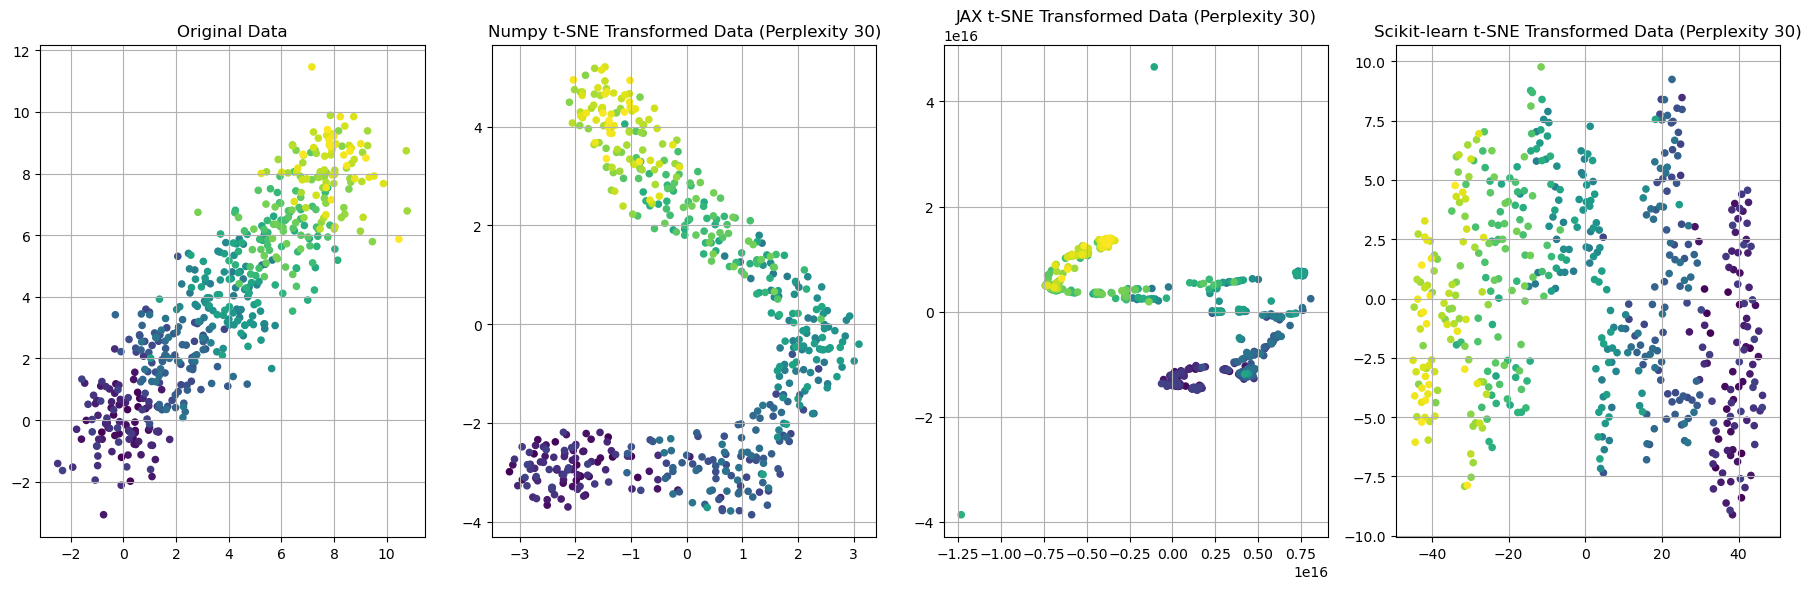

Custom t-SNE JAX Execution Time: 0.7495300769805908 seconds
Custom t-SNE Numpy Execution Time: 1.303609848022461 seconds
Scikit-learn t-SNE Execution Time: 3.87636399269104 seconds


In [1]:
import tsnejax
import tsnenumpy
import time
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Define constant synthetic cluster data with more clusters
num_clusters = 5
cluster_size = 100
data = np.vstack([np.random.randn(cluster_size, 2) + i * 2 for i in range(num_clusters)])

# Best perplexity chosen from the previous hyperparameter search
best_perplexity = 30

# Record the start time for the custom t-SNE implementation
start_time_custom = time.time()

# Compute low-dimensional embedding for the best perplexity
Y_custom_jax = tsnejax.compute_low_dimensional_embedding(data, num_dimensions=2, target_perplexity=best_perplexity)

# Calculate the execution time for the custom t-SNE implementation
end_time_custom = time.time()
custom_tsne_time = end_time_custom - start_time_custom

# Record the start time for the custom t-SNE implementation
start_time_custom = time.time()

# Compute low-dimensional embedding for the best perplexity
Y_custom_numpy = tsnenumpy.compute_low_dimensional_embedding(data, num_dimensions=2, target_perplexity=best_perplexity)

# Calculate the execution time for the custom t-SNE implementation
end_time_custom = time.time()
custom_tsne_numpy_time = end_time_custom - start_time_custom


# Record the start time for the scikit-learn t-SNE implementation
start_time_sklearn = time.time()

# Apply t-SNE using scikit-learn for comparison
tsne = TSNE(n_components=2, perplexity=best_perplexity, random_state=0)
Y_sklearn = tsne.fit_transform(data)

# Calculate the execution time for the scikit-learn t-SNE implementation
end_time_sklearn = time.time()
sklearn_tsne_time = end_time_sklearn - start_time_sklearn

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Plot the original data
axes[0].scatter(data[:, 0], data[:, 1], 20, range(len(data)))
axes[0].set_title('Original Data')
axes[0].grid(True)

# Plot the jax t-SNE results with the best perplexity
axes[1].scatter(Y_custom_numpy[:, 0], Y_custom_numpy[:, 1], 20, range(len(Y_custom_numpy)))
axes[1].set_title(f'Numpy t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[1].grid(True)

# Plot the numpy t-SNE results with the best perplexity
axes[2].scatter(Y_custom_jax[:, 0], Y_custom_jax[:, 1], 20, range(len(Y_custom_jax)))
axes[2].set_title(f'JAX t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[2].grid(True)

# Plot scikit-learn t-SNE results with the same perplexity
axes[3].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], 20, range(len(Y_sklearn)))
axes[3].set_title(f'Scikit-learn t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[3].grid(True)

# Display the subplots
plt.tight_layout()
plt.show()
# Print the execution times
print(f"Custom t-SNE JAX Execution Time: {custom_tsne_time} seconds")
print(f"Custom t-SNE Numpy Execution Time: {custom_tsne_numpy_time} seconds")
print(f"Scikit-learn t-SNE Execution Time: {sklearn_tsne_time} seconds")

